# <ins>Recommendation Engines Assingment I </ins>
Author: Eugen Daniel Wettstein
## <ins>Collaborative Filtering Engine</ins>
### Problem 1: 
*Calculate the Pearson Coefficient between Sophia and Nuria*

In [110]:
# Libraries to be used
import numpy as np
from scipy import stats, spatial
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline

In [111]:
# Reading of DF
df = pd.read_csv('critics.csv',index_col = 'User')
df.head()

,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,Pulp Fiction,Stand by Me,Shakespeare in Love,Total Recall,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe
User,,,,,,,,,,,,,,,,,,,,
John,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,NaN,3.0,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
Maria,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,NaN,4.0,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
Anton,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,NaN,1.0,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
Roger,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,4.0,NaN,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
Martina,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,NaN,1.0,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN


In [112]:
# Corr for Sophia and Nuria
df_sn = df.loc[('Sophia','Nuria'),:].dropna(axis = 1)

pearson_corr_sn, _ = stats.pearsonr(df_sn.iloc[0,:],df_sn.iloc[1,:])
print('The pearson correlation between Sophia and Nuria is',pearson_corr_sn)

The pearson correlation between Sophia and Nuria is 0.3651483716701108


### Problem 2: 

*How is the scatterplot for the movie ratings of Sophia and Nuria compared with the ratings of Maria and Nerea on a scatter plot? What about Chris and Jim? What does it means?*

In [113]:
# Corr for Maria and Nerea
df_mn = df.loc[('Maria','Nerea'),:].dropna(axis = 1)

pearson_corr_mn, _ = stats.pearsonr(df_mn.iloc[0,:],df_mn.iloc[1,:])
print('The pearson correlation between Maria and Nerea is',pearson_corr_mn)

The pearson correlation between Maria and Nerea is -0.3009646327144231


In [114]:
# Corr for Jim and Chris
df_jc = df.loc[('Jim','Chris'),:].dropna(axis = 1)

pearson_corr_cj, _ = stats.pearsonr(df_jc.iloc[0,:],df_jc.iloc[1,:])
print('The pearson correlation between Maria and Nerea is',pearson_corr_cj)

The pearson correlation between Maria and Nerea is 0.8255243089185107


In [115]:
#we know that the slope is given by the formula y = m*x + b

# For Nuria and Sophia
b_sn = df_sn.iloc[0,0]-pearson_corr_sn*df_sn.iloc[1,0]
values_sn = [pearson_corr_sn*n + b_sn for n in range(1,6)]

#For Maria and Nerea
b_mn = df_mn.iloc[0,0]-pearson_corr_sn*df_mn.iloc[1,0]
values_mn = [pearson_corr_mn*n + b_mn for n in range(1,6)]

# For Chris and Jim
b_cj = df_jc.iloc[0,0]-pearson_corr_cj*df_jc.iloc[1,0]
values_cj = [pearson_corr_cj*n + b_cj for n in range(1,6)]

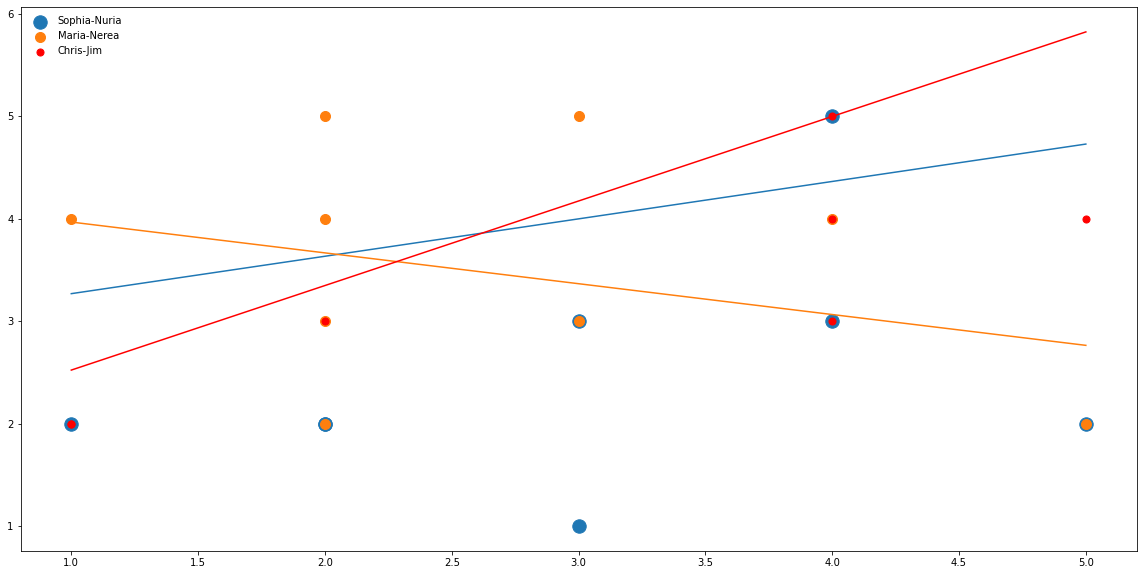

In [116]:
#Adding info to plot
plt.figure(figsize=(20, 10))
ax = plt.gca()

#Plotting of the data

ax.scatter(df_sn.iloc[0,:],df_sn.iloc[1,:], label = 'Sophia-Nuria', s = 180);
ax.plot(range(1,6), values_sn, label = '');

ax.scatter(df_mn.iloc[0,:], df_mn.iloc[1,:], label = 'Maria-Nerea', s = 100);
ax.plot(range(1,6), values_mn, label = '')

ax.scatter(df_jc.iloc[0,:], df_jc.iloc[1,:], label = 'Chris-Jim', c = 'red', s = 50)
ax.plot(range(1,6), values_cj, c = 'red', label = '')

ax.legend(loc = 'best', frameon = False);

>We can see that Sophia and Nuria have a slow increase in the slope. Same for Chris and Jim with the only diffrence that it is steeper. This means if Sophia rates a movie bad also Nuria rates it bad and if one rates it good the other might aswell. The thing is with a correletion of 0.36 the relationship is not so strong.

>For Maria and Nerea is the opposite. If one rates a movie good the other rates it bad and vise versa.

### Problem 3: 

*Return the top-5 recommended movies for Sophia Use the weighted average of every other critic's rankings.*

In [117]:
# Calculation for the means
means = [df.iloc[n,:].dropna(axis = 0).to_numpy().mean() for n in range(0,df.shape[0])]
df['mean_rating'] = means

In [118]:
# Standardizing
n = 0
for row in df.itertuples(index = False):
    if df.index[n] == "Sophia":
        n += 1
        next
    else:
        df.iloc[n,:-1] = row[:-1] - df.mean_rating[n]
        n += 1
df.head()

,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,Pulp Fiction,Stand by Me,...,Total Recall,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe,mean_rating
User,,,,,,,,,,,,,,,,,,,,,
John,-2.071429,1.928571,-1.071429,NaN,0.928571,0.928571,-1.071429,-1.071429,NaN,-0.071429,...,NaN,1.928571,-1.071429,NaN,0.928571,-1.071429,1.928571,NaN,NaN,3.071429
Maria,2.214286,0.214286,NaN,-0.785714,1.214286,-0.785714,-1.785714,NaN,NaN,1.214286,...,-0.785714,-0.785714,NaN,-0.785714,NaN,2.214286,-1.785714,0.214286,NaN,2.785714
Anton,NaN,NaN,NaN,2.538462,-0.461538,NaN,1.538462,NaN,NaN,-1.461538,...,-1.461538,1.538462,1.538462,-1.461538,-1.461538,-0.461538,0.538462,-1.461538,0.538462,2.461538
Roger,NaN,0.307692,NaN,NaN,NaN,-1.692308,-0.692308,0.307692,1.307692,NaN,...,1.307692,-1.692308,0.307692,2.307692,NaN,2.307692,-1.692308,-1.692308,-0.692308,2.692308
Martina,0.785714,-0.214286,0.785714,-2.214286,0.785714,-2.214286,NaN,0.785714,NaN,-2.214286,...,-2.214286,NaN,0.785714,NaN,-0.214286,1.785714,1.785714,NaN,NaN,3.214286


In [119]:
# Calculation of the pearson corr for each one

# Getting all the users
corr = []
for i in df.itertuples(index = True): #iterating over all the rows
    df_corr = df.loc[('Sophia',i[0]),:].dropna(axis = 1) # dropping all the movies that are not in common
    corr.append(stats.pearsonr((df_corr.iloc[0,:-1]-df_corr.iloc[0,-1]),df_corr.iloc[1,:-1])[0])
    
df['w_sopia_u'] = corr
df.head()

,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,Pulp Fiction,Stand by Me,...,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe,mean_rating,w_sopia_u
User,,,,,,,,,,,,,,,,,,,,,
John,-2.071429,1.928571,-1.071429,NaN,0.928571,0.928571,-1.071429,-1.071429,NaN,-0.071429,...,1.928571,-1.071429,NaN,0.928571,-1.071429,1.928571,NaN,NaN,3.071429,0.277098
Maria,2.214286,0.214286,NaN,-0.785714,1.214286,-0.785714,-1.785714,NaN,NaN,1.214286,...,-0.785714,NaN,-0.785714,NaN,2.214286,-1.785714,0.214286,NaN,2.785714,0.492592
Anton,NaN,NaN,NaN,2.538462,-0.461538,NaN,1.538462,NaN,NaN,-1.461538,...,1.538462,1.538462,-1.461538,-1.461538,-0.461538,0.538462,-1.461538,0.538462,2.461538,-0.184664
Roger,NaN,0.307692,NaN,NaN,NaN,-1.692308,-0.692308,0.307692,1.307692,NaN,...,-1.692308,0.307692,2.307692,NaN,2.307692,-1.692308,-1.692308,-0.692308,2.692308,-0.306989
Martina,0.785714,-0.214286,0.785714,-2.214286,0.785714,-2.214286,NaN,0.785714,NaN,-2.214286,...,NaN,0.785714,NaN,-0.214286,1.785714,1.785714,NaN,NaN,3.214286,0.047717


In [120]:
# Find movies that are not rated
recomend_mov = df.loc['Sophia'][df.loc['Sophia'].isna()].index

# Getting the weights
weights = df.iloc[:,-1]

# Generate the ratings for the missing movies
recomm = [df.loc['Sophia','mean_rating'] + np.nansum(df.loc[:,recomend_mov].T.iloc[n,:]*weights)/sum(abs(weights)) for n in range(0,7)]

# Creating Df and transpose
recomm = pd.DataFrame(recomm).T

# Setting column names
recomm.columns = recomend_mov
recomm.rename(index={0:'Sophia'}, inplace = True)

# Top 5 recommendations 
recomm.T.nlargest(5,'Sophia')

,Sophia
The Matrix,3.711246
Forrest Gump,3.463124
The Sixth Sense,3.308819
Shakespeare in Love,3.119828
Blade Runner,2.942900


### 4) Top similar critics
Return the top 5 critics that are most similar to Sophia. 

In [121]:
pd.DataFrame(df.drop('Sophia').nlargest(5,'w_sopia_u').loc[:,'w_sopia_u'])

,w_sopia_u
User,
Rachel,0.944911
Ana,0.597614
Oriol,0.578979
Maria,0.492592
Carles,0.427325


## <ins>Non Personalized Recommendation Engine</ins>
### Problem 1: 
*Calculate mean rating for each movie, ordered with the highest rating listed first, and plot the top 5.*

                            Avg_rating
The Shawshank Redemption      3.600000
 Star Wars IV - A New Hope    3.266667
Blade Runner                  3.222222
Groundhog Day                 3.166667
The Silence of the Lambs      3.062500


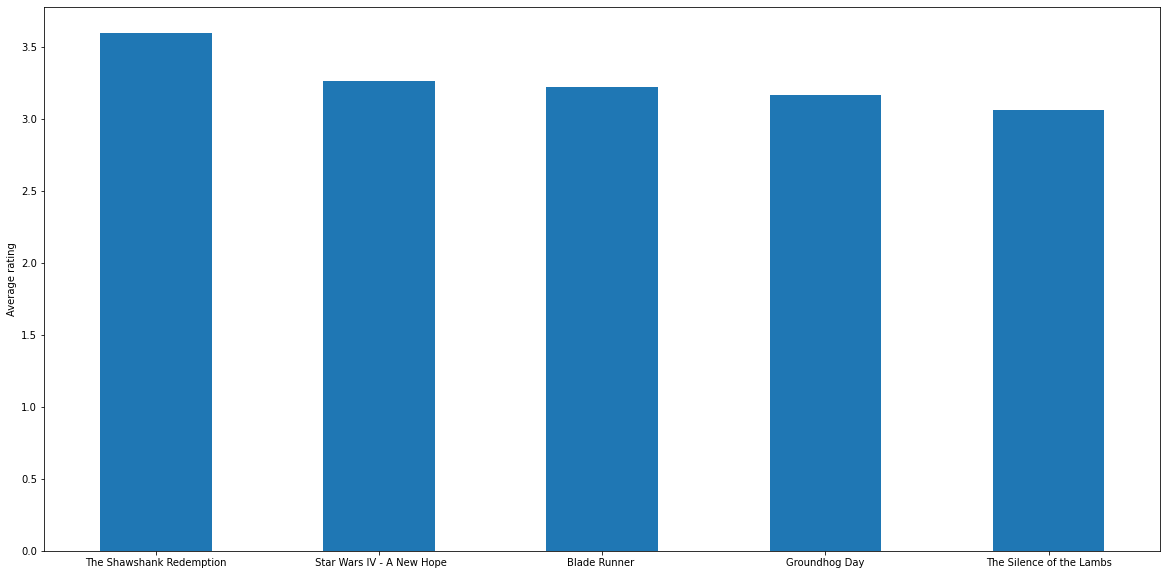

In [122]:
# Loading of the dataset
df = pd.read_csv('critics.csv',index_col = 'User')

# Top 5 movies by average rating
df_top5 = pd.DataFrame({'Avg_rating':df.mean(axis = 0).nlargest(5)})
print(df_top5)

# Plot
var = df_top5.plot(figsize=(20, 10),kind = 'bar', rot = 0, ylabel = 'Average rating', legend = None)


### Problem 2: 

Calculate the percentage of ratings for each movie that are 4 stars or higher. Order with the highest percentage first, and plot the top 5 movies with more high ratings distribution.

The Shawshank Redemption      70.000000
 Star Wars IV - A New Hope    53.333333
Gladiator                     50.000000
Blade Runner                  44.444444
The Silence of the Lambs      43.750000
dtype: float64


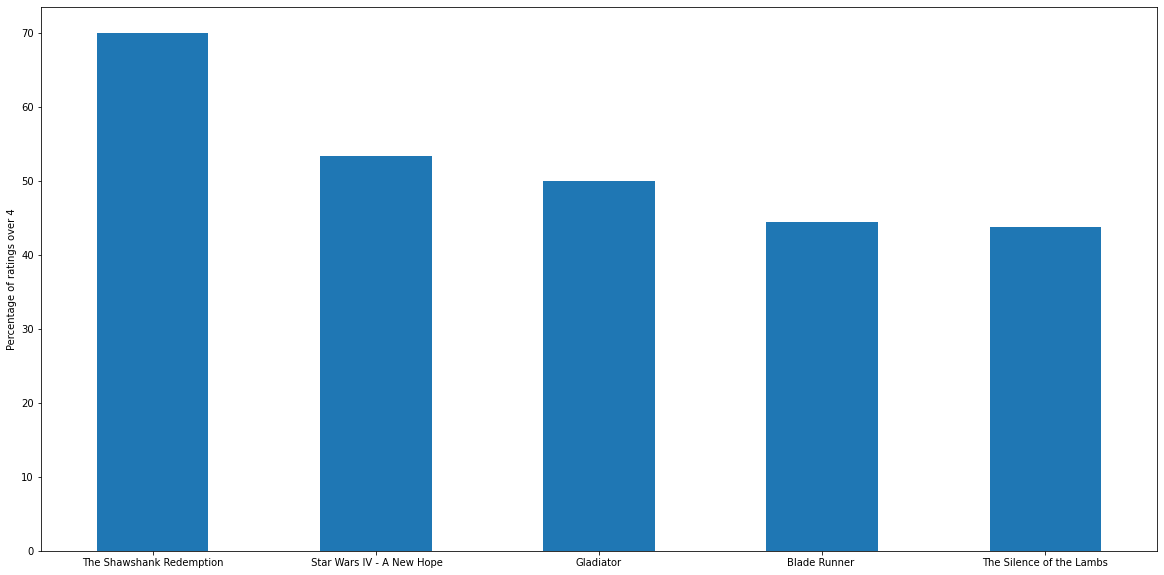

In [123]:
# Ratings per movie over 4
over4 = df[df>=4].count()/df.count()*100

# Top 5
print(over4.nlargest(5))

# Plot
var = over4.nlargest(5).plot(figsize=(20, 10),kind = 'bar', rot = 0, ylabel = 'Percentage of ratings over 4')

### Problem 3 
Count the number of ratings for each movie, order the one with most number of ratings first, submit the top 5.


In [124]:
# Count the number of ratings for Top 5 movies
df.count().nlargest(5)

Toy Story                             17
The Silence of the Lambs              16
 Star Wars IV - A New Hope            15
 Star Wars VI - Return of the Jedi    14
Independence Day                      13
dtype: int64

### Problem 4
Calculate movies that most often occur with other movie. For each movie, calculate the percentage of the other movie raters who also rated that movie. Order with the highest percentage first, and submit the top 5. Select "Star.Wars.IV...A.New.Hope" movie by defaut. Use the (x+y)/x method.

In [125]:
# Extracting all thge people that watched Star Wars IV - A New Hope
df4 = df.loc[df.loc[:,' Star Wars IV - A New Hope'].dropna().index]

# Percentage of people that saw Star Wars IV - A New Hope and an other movie
df4_perc = df4.count()/df4.loc[:,' Star Wars IV - A New Hope'].count()*100

# Top 5 movies watched together with Star Wars IV - A New Hope
df4_perc.drop(' Star Wars IV - A New Hope').nlargest(5)

Toy Story                             93.333333
 Star Wars VI - Return of the Jedi    86.666667
The Silence of the Lambs              80.000000
Independence Day                      73.333333
Total Recall                          66.666667
dtype: float64

### Problem 5
Calculate the movies better rated of people who liked a movie. Select the people who liked the movie "Babe" (4 or 5 stars) and provide the top 5 movies they liked most.

In [126]:
# Top 5 movies of people that rated Babe with 4 or higher
df.loc[df['Babe'] >= 4].drop('Babe',axis = 1).mean().nlargest(5)

Pulp Fiction                5.000000
Groundhog Day               5.000000
The Shawshank Redemption    4.500000
Toy Story                   4.333333
Blade Runner                4.000000
dtype: float64